# Uber Rider Data Case Study

BitTiger DS203

December 2016

##  Project overview

Uber is interested in predicting rider retention. To help explore this question, they have provided a sample dataset of a cohort of users who signed up for an account in January 2014. The data was pulled several months later. 

## Dataset description

- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY­MM­DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY­MM­DD’ 
- avg_dist: the average distance *(in miles) per trip taken in the first 30 days after signup 
- avg_rating_by_driver: the rider’s average rating over all of their trips 
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips 
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- luxury_car_user: True if the user took an luxury car in their first 30 days; False otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

## Load data and browse data

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
# Load data from file
df = pd.read_csv('data/churn.csv')

In [3]:
# Inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
# Browse dataset
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [5]:
# Show summary stats
df.describe()

/Users/stone/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,NaN,NaN,1.000000,0.000000,0.000000,33.300000
50%,3.880000,NaN,NaN,1.000000,0.000000,1.000000,66.700000
75%,6.940000,NaN,NaN,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [6]:
# Count missing values by column
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

## Explore data

### Numeric variables

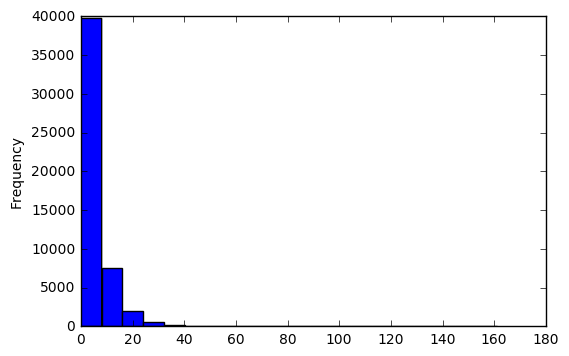

In [7]:
df['avg_dist'].plot.hist(bins=20)

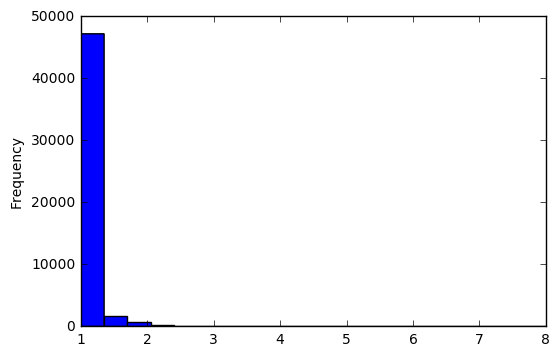

In [8]:
df['avg_surge'].plot.hist(bins=20)

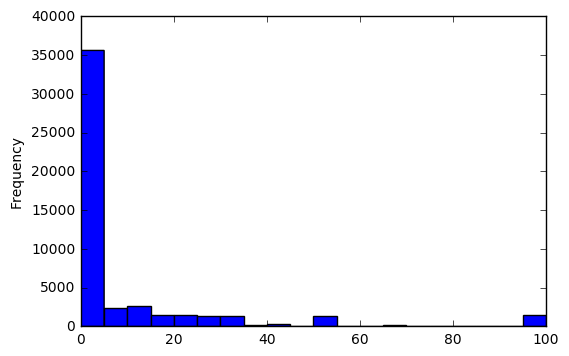

In [9]:
df['surge_pct'].plot.hist(bins=20)

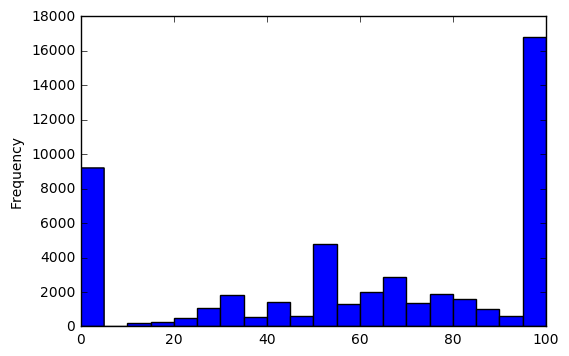

In [10]:
df['weekday_pct'].plot.hist(bins=20)

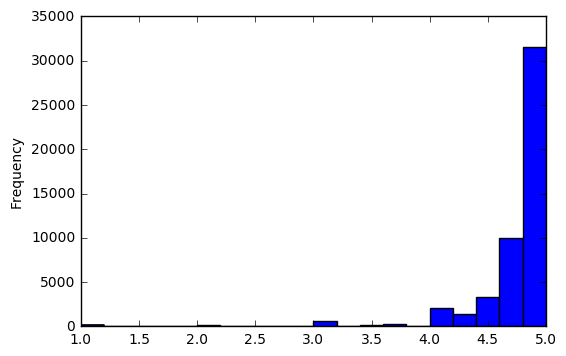

In [11]:
df['avg_rating_by_driver'].plot.hist(bins=20)

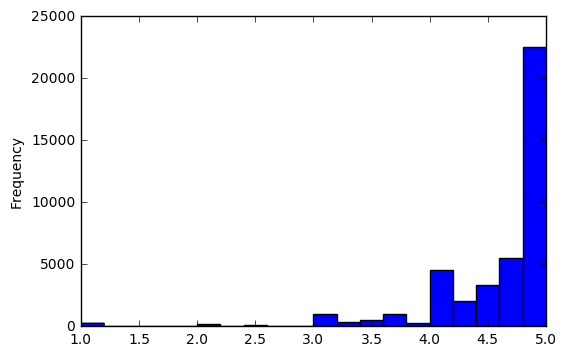

In [12]:
df['avg_rating_of_driver'].plot.hist(bins=20)

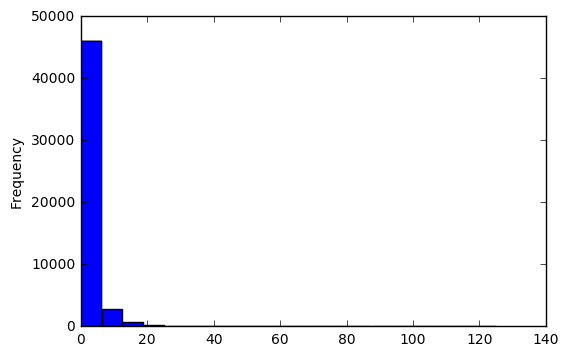

In [13]:
df['trips_in_first_30_days'].plot.hist(bins=20)

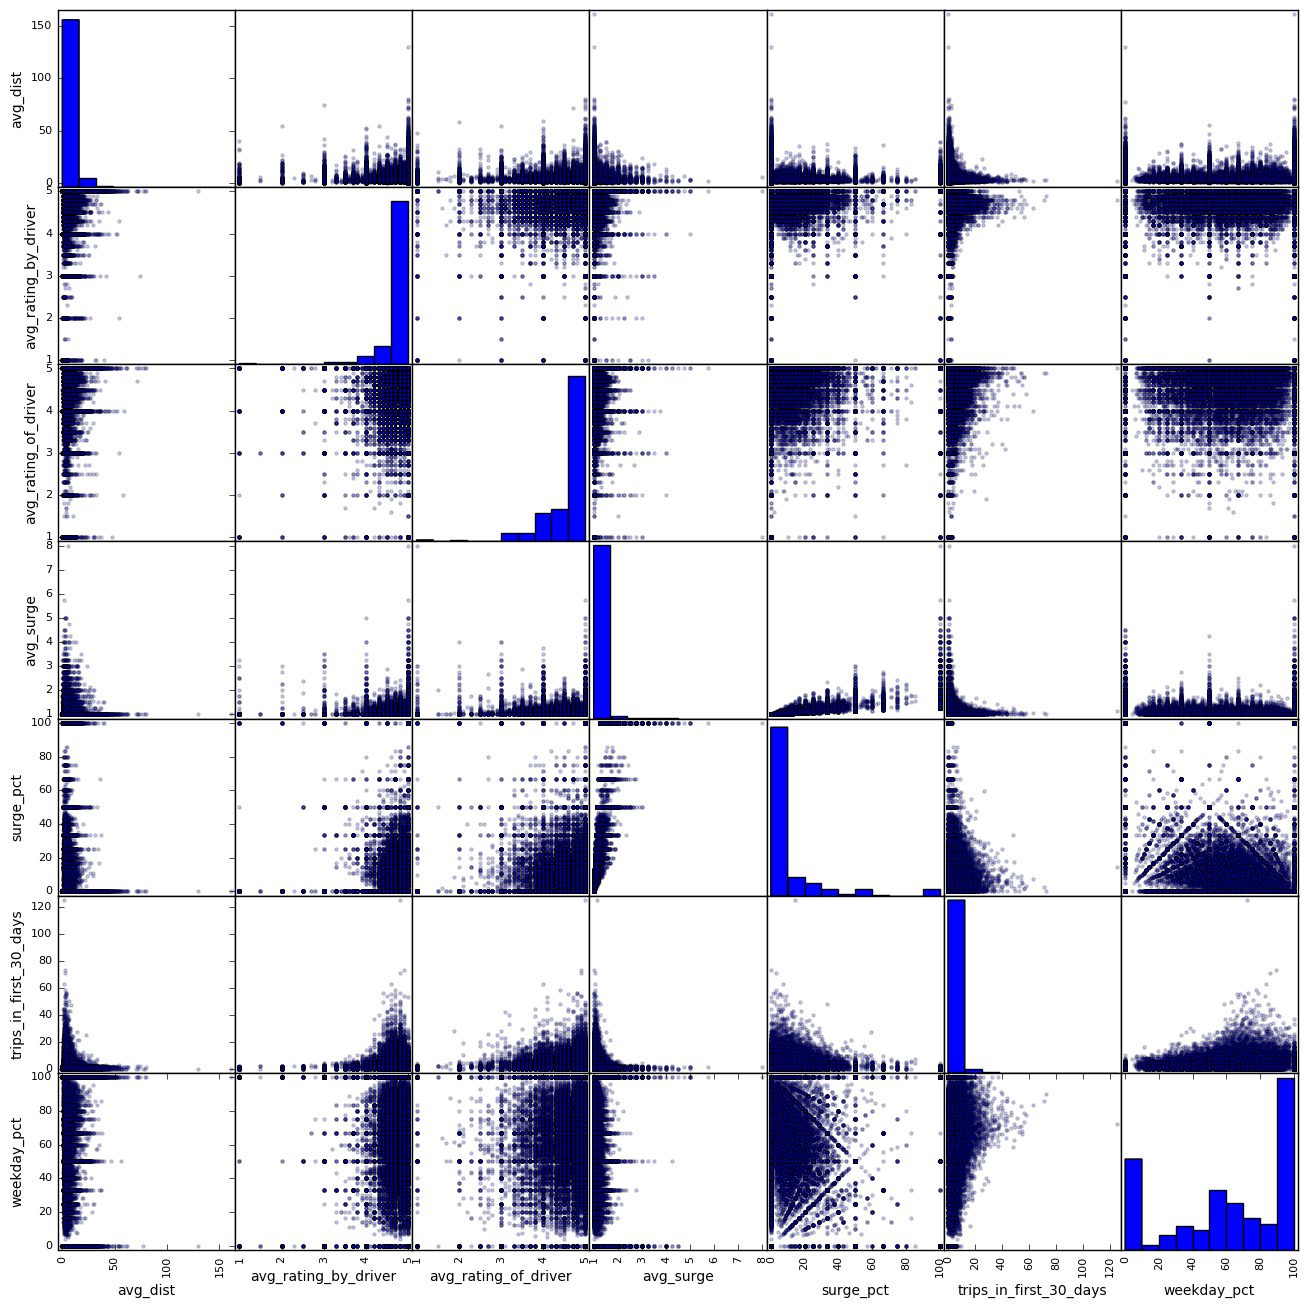

In [14]:
# Use scatter_matrix from Pandas
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[[u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', u'surge_pct', u'trips_in_first_30_days', u'weekday_pct']],
               alpha=0.2, figsize=(16, 16), diagonal='hist')
plt.show()

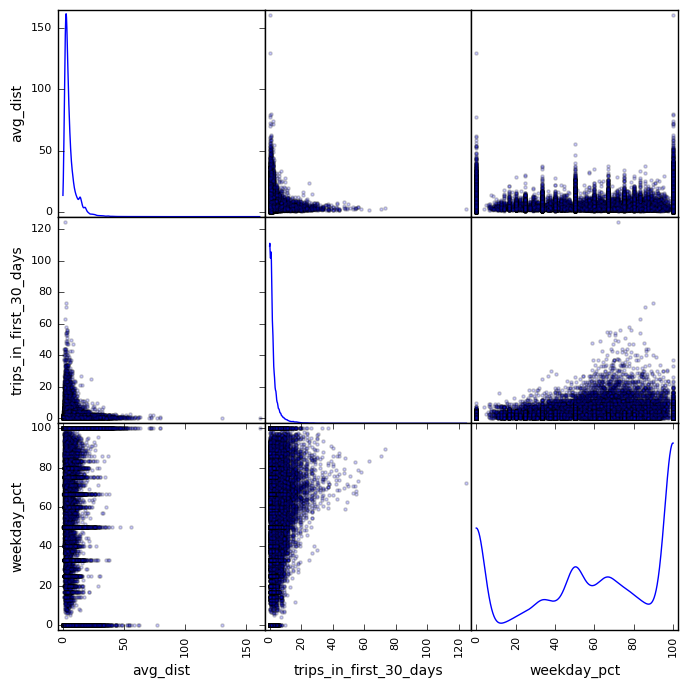

In [15]:
# Use scatter_matrix from Pandas
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[[u'avg_dist', u'trips_in_first_30_days', u'weekday_pct']], 
               alpha=0.2, figsize=(8, 8), diagonal='kde')
plt.show()

### Categorical variables

In [16]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

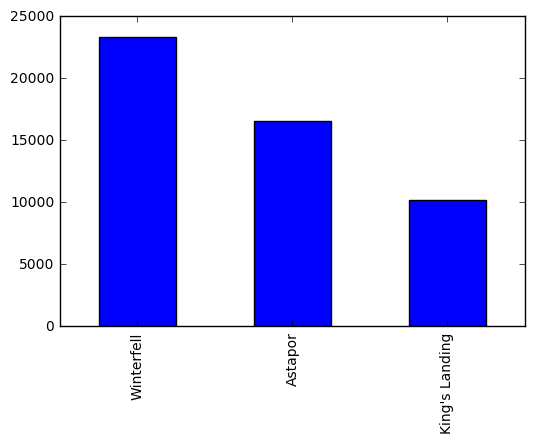

In [17]:
df['city'].value_counts().plot.bar()

In [18]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

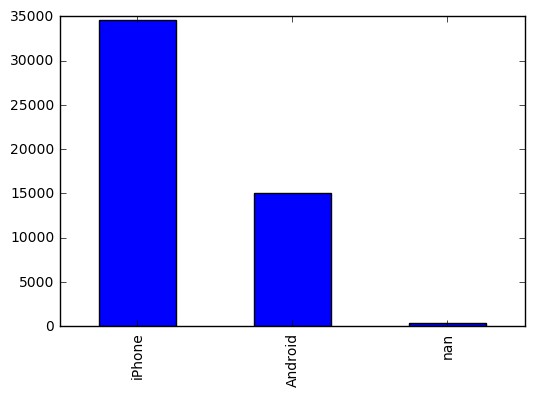

In [19]:
df['phone'].value_counts(dropna=False).plot.bar()

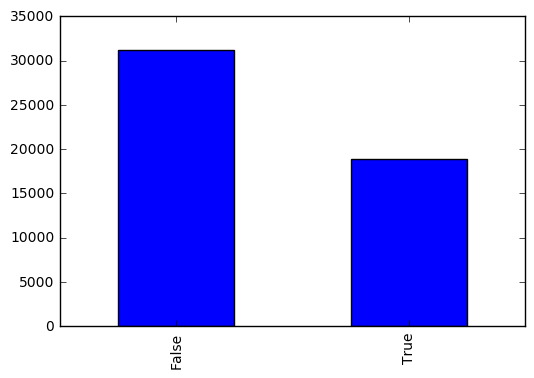

In [20]:
df['luxury_car_user'].value_counts().plot.bar()

## Clean data - dealing with missing values

In [21]:
# Count missing values by column
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

#### Option 1: drop all rows that have missing values

In [22]:
df_dropna = df.dropna(axis=0)

In [23]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
luxury_car_user           41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [24]:
df_dropna.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,8.898709,2.609675,61.254897
std,5.145174,0.404606,0.616104,0.198747,18.322061,4.059336,34.813848
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


#### Option 2: fill missing values

In [25]:
# Make a copy of df, because you don't want to mess up with orignal df when you experiment stuff
df_fillna = df.copy()

In [26]:
# Fill missing value for phone
df_fillna['phone'] = df['phone'].fillna('no_phone')

In [27]:
# Fill missing values with median
df_fillna['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median())
df_fillna['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median())

In [28]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [29]:
df_fillna.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


#### Decision
We need to decide whether we should exclude data with missing value. We need statistical tools to help us decide. 


In [30]:
# For now we will move on (to be revisited)
df = df_fillna

## Transform data

### Time-series variables

In [31]:
# convert time-series information to datetime data type
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [32]:
# construct a new df to experiment on the time-series 
df_timestamp = df[['last_trip_date', 'signup_date']].copy()

In [33]:
df_timestamp['count'] = 1

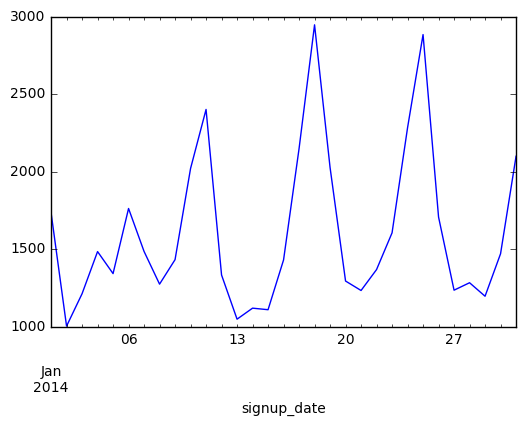

In [34]:
df_timestamp = df_timestamp.set_index('signup_date')
df_timestamp['count'].resample("1D").sum().plot()

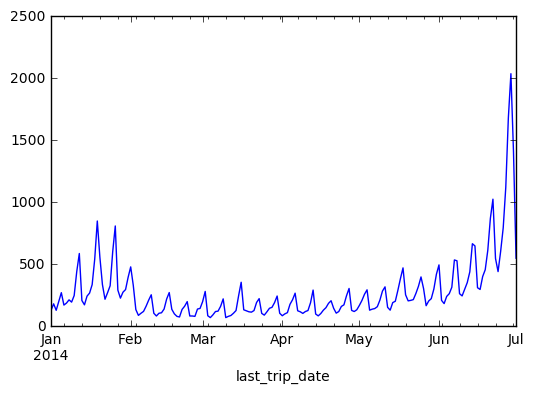

In [35]:
df_timestamp = df_timestamp.set_index('last_trip_date')
df_timestamp['count'].resample("1D").sum().plot()

In [36]:
# Experiment block
date_in_string = '2014-06-01'
date_in_datetime = pd.to_datetime(date_in_string)
print date_in_datetime
print date_in_datetime.dayofweek

2014-06-01 00:00:00
6


In [37]:
# There might be some signal from day of week when a user signed up Uber, so let's create a column for that
df['signup_dow'] = df['signup_date'].apply(lambda x: x.dayofweek)

In [38]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


### Converting categorical variables

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
signup_dow                50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


Categorical variables:
* city
* phone
* luxury_car_user
* signup_dow

#### Convert bool columns to int

In [40]:
df['luxury_car_user'] = df['luxury_car_user'].astype(int)

In [41]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


#### Encode categorical columns to numeric values

In [42]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


In [43]:
col_category = ['signup_dow', 'city', 'phone']

In [44]:
df_dummies = pd.get_dummies(df[col_category], columns=col_category)

In [45]:
df_dummies

,signup_dow_0,signup_dow_1,signup_dow_2,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [46]:
df = df.join(df_dummies)

In [47]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [48]:
df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct', u'signup_dow', u'signup_dow_0', u'signup_dow_1',
       u'signup_dow_2', u'signup_dow_3', u'signup_dow_4', u'signup_dow_5',
       u'signup_dow_6', u'city_Astapor', u'city_King's Landing',
       u'city_Winterfell', u'phone_Android', u'phone_iPhone',
       u'phone_no_phone'],
      dtype='object')

## Define a label/target/outcome

Add churn indicator. Considered to churn if have not taken a trip in the last 30 days. In practice, you will often have to figure out how to generate a reasonable label to train your dataset. Is the cutoff of 30 days reasonable?  You may want to test this... Sometimes, the correct label is even less obvious; your ability to make a sensible (and defensible) decision in these cases is important.

In [49]:
# Define churn: users did not take a trip during last 30 days, i.e. last trip date is earlier than 2014-06-01
df['churn'] = (df.last_trip_date < pd.to_datetime('2014-06-01')) * 1
df['active'] = (df.last_trip_date >= pd.to_datetime('2014-06-01')) * 1

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,signup_dow_5,signup_dow_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,churn,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0


In [50]:
df['churn'].mean()

0.62392000000000003

In [51]:
df['active'].mean()

0.37608000000000003

## EDA with label

### colored scatter_matrix

In [52]:
colors = ['red' if ix else 'blue' for ix in df['active']]

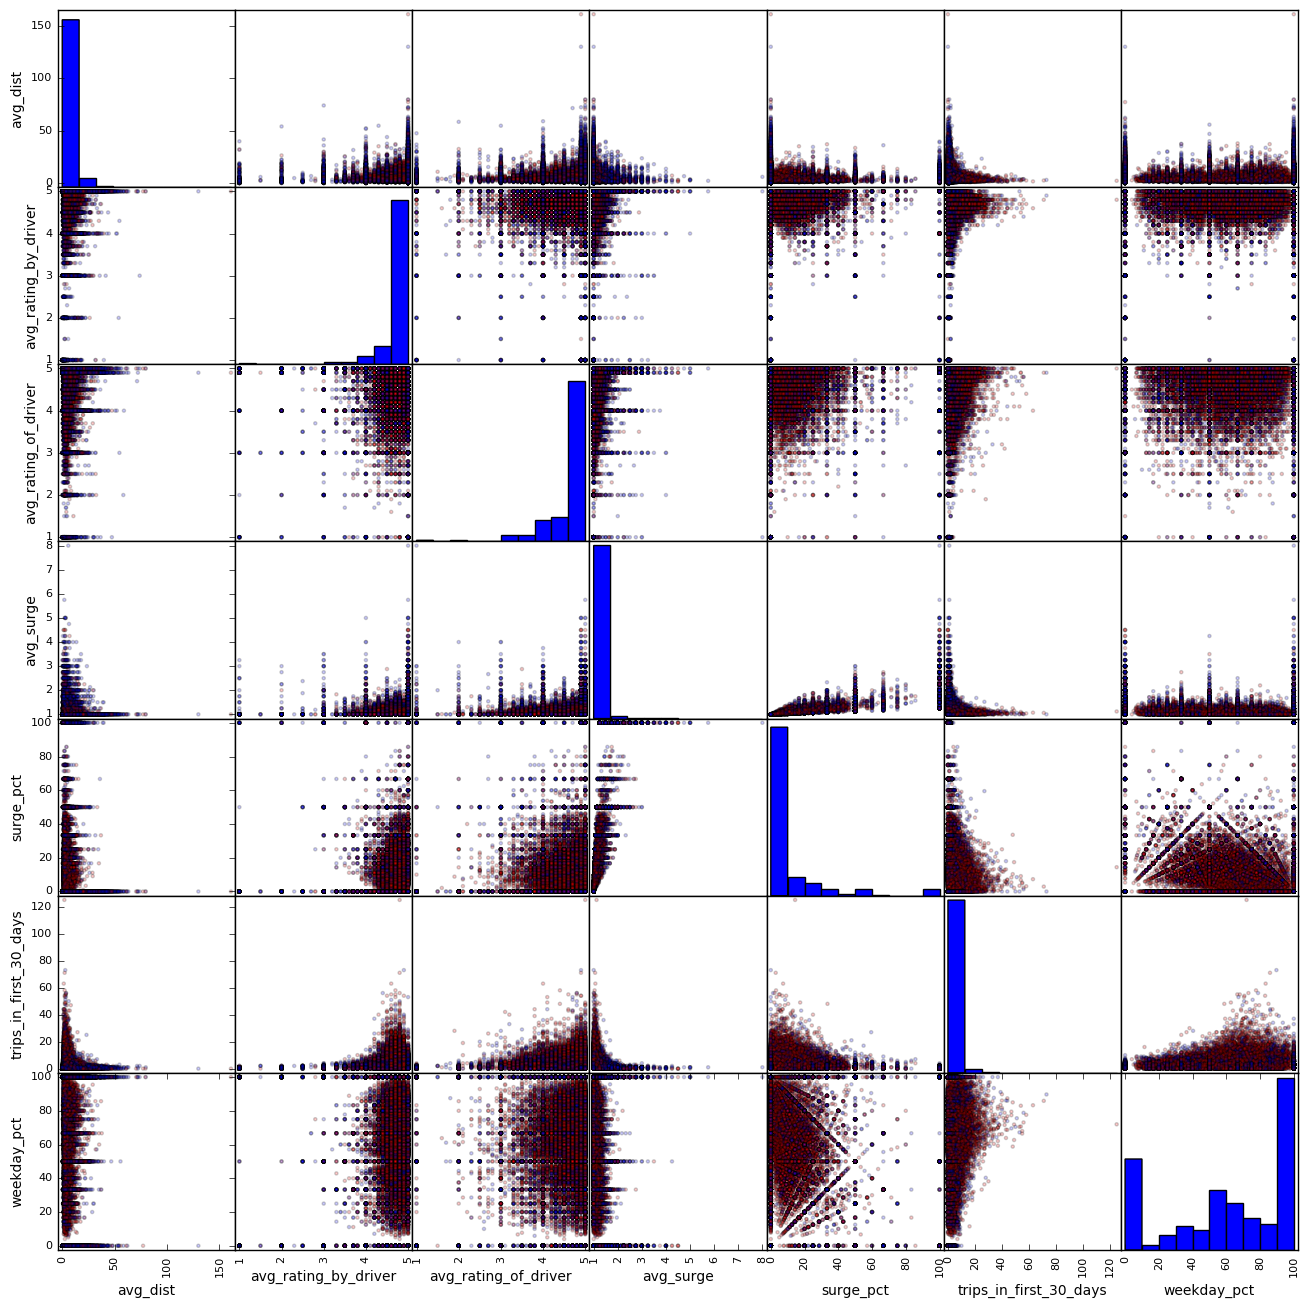

In [53]:
scatter_matrix(df[[u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', 
                  u'avg_surge', u'surge_pct', u'trips_in_first_30_days', u'weekday_pct']],
               alpha=0.2, figsize=(16, 16), diagonal='hist', c=colors)
plt.show()

### Explore churn rate split by features 

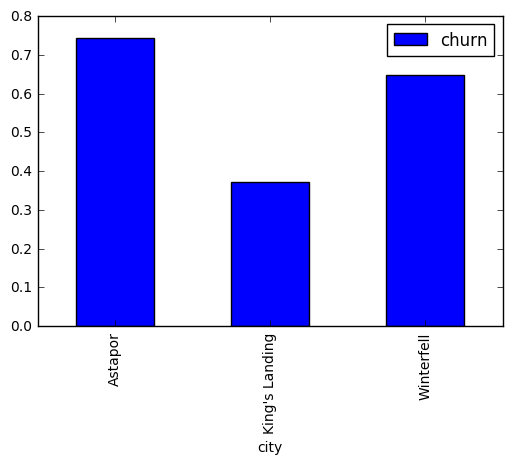

In [54]:
df[['city', 'churn']].groupby(['city']).mean().plot.bar()

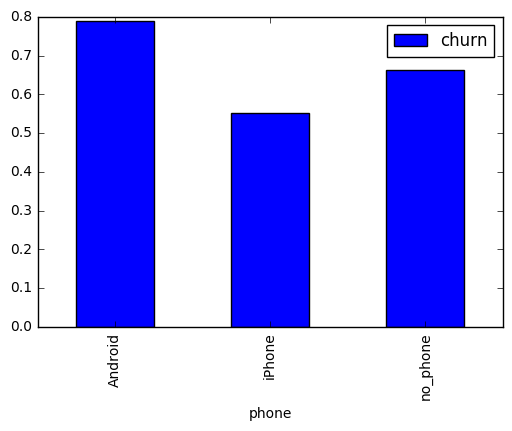

In [55]:
df[['phone', 'churn']].groupby(['phone']).mean().plot.bar()

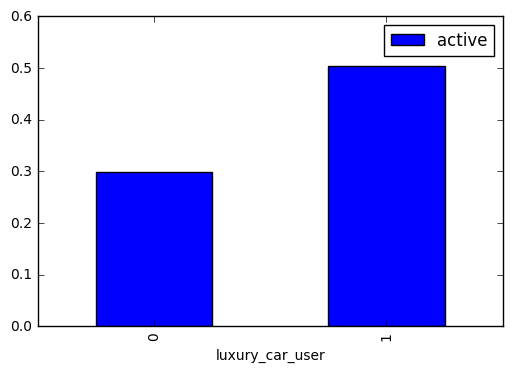

In [56]:
df[['luxury_car_user', 'active']].groupby(['luxury_car_user']).mean().plot.bar()

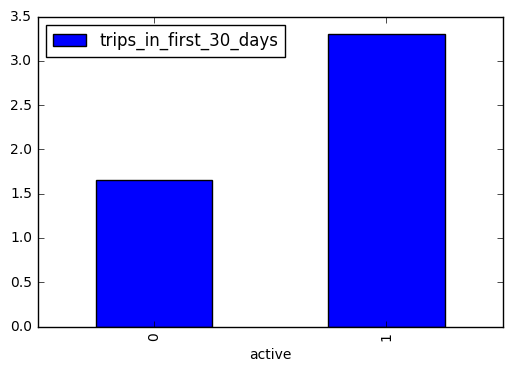

In [57]:
df[['trips_in_first_30_days', 'active']].groupby(['active']).mean().plot.bar()

In [58]:
is_active = df['active'] == 1

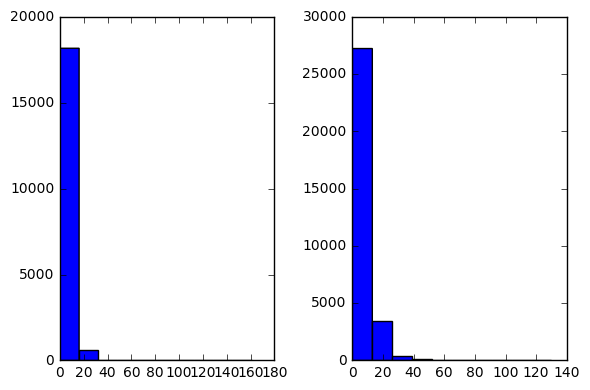

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(df[is_active]['avg_dist'].values)
axes[1].hist(df[~is_active]['avg_dist'].values)
fig.tight_layout()
plt.show()

#### Abstract out the plotting machine

In [60]:
def hist_active_vs_churn(df, col_name):
    is_active = df['active'] == 1
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].hist(df[is_active][col_name].values)
    axes[0].set_title("active users")
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel("counts")
    axes[1].hist(df[~is_active][col_name].values)
    axes[1].set_title("churned users")
    axes[1].set_xlabel(col_name)
    axes[1].set_ylabel("counts")
    fig.tight_layout()
    plt.show()

In [61]:
df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct', u'signup_dow', u'signup_dow_0', u'signup_dow_1',
       u'signup_dow_2', u'signup_dow_3', u'signup_dow_4', u'signup_dow_5',
       u'signup_dow_6', u'city_Astapor', u'city_King's Landing',
       u'city_Winterfell', u'phone_Android', u'phone_iPhone',
       u'phone_no_phone', u'churn', u'active'],
      dtype='object')

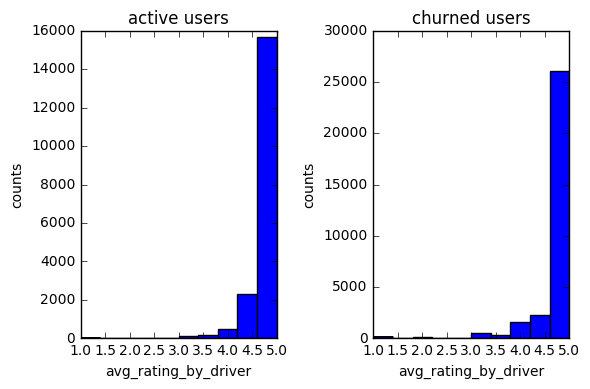

In [62]:
hist_active_vs_churn(df, col_name=u'avg_rating_by_driver')

In [63]:
cols = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge']

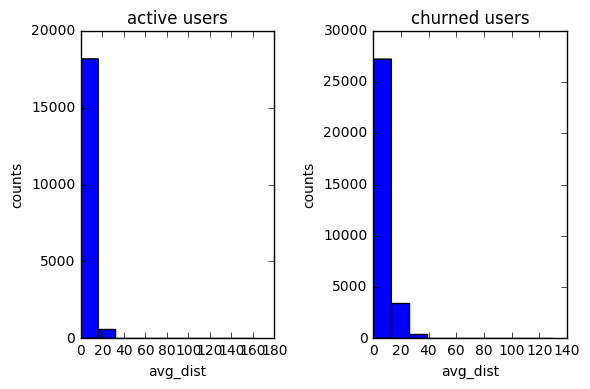

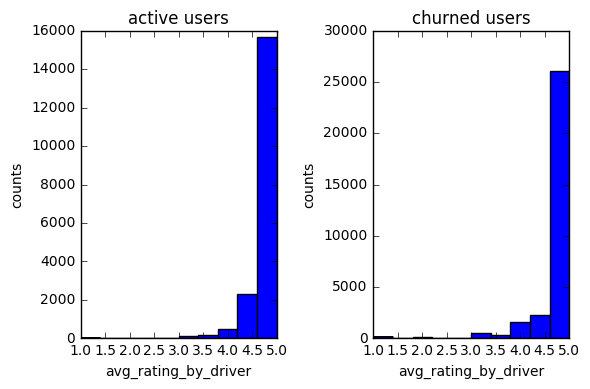

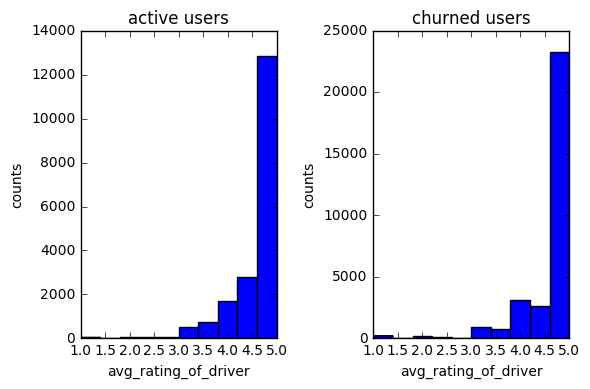

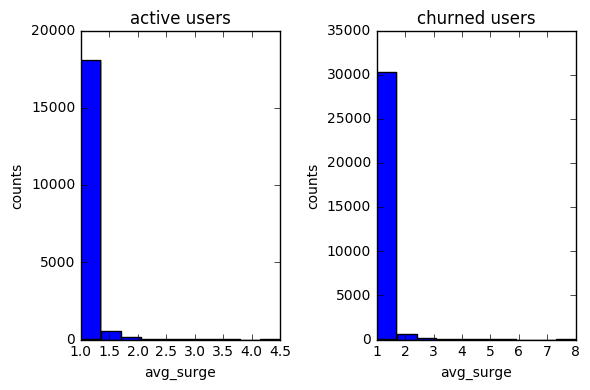

In [64]:
for col in cols:
    hist_active_vs_churn(df, col_name=col)

## Rescale the data

### Select which features to be rescaled

In [65]:
df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct', u'signup_dow', u'signup_dow_0', u'signup_dow_1',
       u'signup_dow_2', u'signup_dow_3', u'signup_dow_4', u'signup_dow_5',
       u'signup_dow_6', u'city_Astapor', u'city_King's Landing',
       u'city_Winterfell', u'phone_Android', u'phone_iPhone',
       u'phone_no_phone', u'churn', u'active'],
      dtype='object')

In [66]:
selected_features = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone', u'signup_dow_0', 
                     u'signup_dow_1', u'signup_dow_2', u'signup_dow_3', u'signup_dow_4', 
                     u'signup_dow_5', u'signup_dow_6']

In [67]:
X = df[selected_features].values

In [68]:
X

array([[ 3.67,  5.  ,  4.7 , ...,  0.  ,  1.  ,  0.  ],
       [ 8.26,  5.  ,  5.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.77,  5.  ,  4.3 , ...,  0.  ,  0.  ,  0.  ],
       ..., 
       [ 3.86,  5.  ,  5.  , ...,  1.  ,  0.  ,  0.  ],
       [ 4.58,  3.5 ,  3.  , ...,  0.  ,  0.  ,  0.  ],
       [ 3.49,  5.  ,  4.9 , ...,  0.  ,  1.  ,  0.  ]])

In [69]:
X.shape

(50000, 21)

### Standardization

**Standardization** of datasets is a **common requirement for many machine learning estimators implemented in the sklearn**.

By standardization, the dataset will be tranformed into a distribution that has **zero mean and unit variance**.

The transformation might behave badly if the individual features do not more or less look like standard normally distributed data. However, in practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
X_scaled = scaler.fit_transform(X)

In [72]:
X_scaled

array([[-0.37265024,  0.49543734,  0.08680056, ..., -0.49270774,
         2.03568979, -0.38357662],
       [ 0.43158298,  0.49543734,  0.60800005, ..., -0.49270774,
        -0.49123398, -0.38357662],
       [-0.88077146,  0.49543734, -0.60813209, ..., -0.49270774,
        -0.49123398, -0.38357662],
       ..., 
       [-0.33935954,  0.49543734,  0.60800005, ...,  2.02960075,
        -0.49123398, -0.38357662],
       [-0.21320531, -2.8680205 , -2.86666322, ..., -0.49270774,
        -0.49123398, -0.38357662],
       [-0.4041888 ,  0.49543734,  0.43426689, ..., -0.49270774,
         2.03568979, -0.38357662]])

In [73]:
# Now the mean of each column is 0
X_scaled.mean(axis=0)

array([ -2.14228635e-17,   4.60111949e-16,  -5.22106802e-16,
         2.76649814e-16,   6.49436060e-17,   1.33582034e-17,
        -1.17310606e-16,   1.24487087e-16,  -1.06581410e-19,
        -5.72697445e-17,  -7.24043048e-17,   6.21724894e-17,
        -1.71951342e-17,  -3.90798505e-17,   8.85691520e-17,
        -4.91695573e-17,   6.03961325e-17,  -2.29150032e-17,
        -7.31859018e-17,  -2.75690581e-17,  -3.63442609e-17])

In [74]:
# Also verify it with Numpy
np.mean(X_scaled, axis=0)

array([ -2.14228635e-17,   4.60111949e-16,  -5.22106802e-16,
         2.76649814e-16,   6.49436060e-17,   1.33582034e-17,
        -1.17310606e-16,   1.24487087e-16,  -1.06581410e-19,
        -5.72697445e-17,  -7.24043048e-17,   6.21724894e-17,
        -1.71951342e-17,  -3.90798505e-17,   8.85691520e-17,
        -4.91695573e-17,   6.03961325e-17,  -2.29150032e-17,
        -7.31859018e-17,  -2.75690581e-17,  -3.63442609e-17])

In [75]:
# Now the variance of each column is 1
X_scaled.var(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [76]:
# Also verify it with Numpy
np.var(X_scaled, axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

## Unsupervised Dimensionality Reduction

### Use PCA to transform data into a set of values of linearly uncorrelated variables

In [ ]:
# We are using sklearn PCA module
from sklearn.decomposition import PCA

In [ ]:
# Initiate a PCA model
pca = PCA(n_components=20)

In [ ]:
# Fit the model
pca.fit(X_scaled)

In [ ]:
print(pca.explained_variance_ratio_) 

In [ ]:
def scree_plot(pca, title=None):
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.bar(ind, vals, 0.35,
           color=[(0.949, 0.718, 0.004),
                  (0.898, 0.49, 0.016),
                  (0.863, 0, 0.188),
                  (0.694, 0, 0.345),
                  (0.486, 0.216, 0.541),
                  (0.204, 0.396, 0.667),
                  (0.035, 0.635, 0.459),
                  (0.486, 0.722, 0.329),
                 ])

    for i in xrange(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)

    ax.set_xticklabels(ind,
                       fontsize=12)

    ax.set_ylim(0, max(vals)+0.05)
    ax.set_xlim(0-0.45, 8+0.45)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)

    if title is not None:
        plt.title(title, fontsize=16)

In [ ]:
scree_plot(pca, title="Principle Components")

### Use principle components to plot scatter_matrix

In [ ]:
X_pca = pca.transform(X_scaled)

In [ ]:
n_pc = 5

In [ ]:
X_pca[:,:n_pc]

In [ ]:
pca_columns = ['PC %s' % i for i in xrange(n_pc)]

In [ ]:
pca_columns

In [ ]:
df_pca = pd.DataFrame(data=X_pca[:,:5], columns=pca_columns)

In [ ]:
scatter_matrix(df_pca, alpha=0.2, figsize=(16, 16), diagonal='hist', c=colors)
plt.show()

## Statistical Analysis

In [ ]:
import scipy.stats as scs

In [ ]:
df_raw = pd.read_csv('data/churn.csv')

In [ ]:
# Define churn and active
df_raw['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df_raw['churn'] = (df_raw['last_trip_date'] < pd.to_datetime('2014-06-01')) * 1
df_raw['active'] = (df_raw['last_trip_date'] >= pd.to_datetime('2014-06-01')) * 1


### Random Variables
* Expectation: E(X)
* Varaince: Var(X)
* Covariance: Cov(X,Y)
* Correlation: Corr(X,Y)


In [ ]:
df_raw[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge', 
    'surge_pct','trips_in_first_30_days','weekday_pct']].mean()

In [ ]:
df_raw[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge', 
    'surge_pct','trips_in_first_30_days','weekday_pct']].var()

In [ ]:
df_raw[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge', 
    'surge_pct','trips_in_first_30_days','weekday_pct']].std()

In [ ]:
df_raw[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge', 
    'surge_pct','trips_in_first_30_days','weekday_pct']].mode()

In [ ]:
df_raw[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge', 
    'surge_pct','trips_in_first_30_days','weekday_pct']].cov()

In [ ]:
df_raw[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge', 
    'surge_pct','trips_in_first_30_days','weekday_pct']].corr()

It will be nice if we can visualize the correlation matrix

In [ ]:
# you need to install seaborn package if it's not in your anaconda
import seaborn as sns

sns.set(style="white")

# Compute the correlation matrix
corr = df[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge', 
           'surge_pct','trips_in_first_30_days','weekday_pct']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

### Distribution Estimation

#### Parametric 
* Method of moments
* Maximum likelihood estimation

We can use `scipy.stats` to estimate distributions. Here are some helper method 

In [ ]:
def plot_hist_basic(df, col):
    """
    Plot a histogram from the column col of dataframe df. Return a Matplotlib
    axis object.
    INPUT:
    df: (Pandas DataFrame)
    col: (str) Column from df with numeric data to be plotted
    OUTPUT:
    ax: (Matplotlib axis object) 
    """
    data = df[col]
    ax = data.hist(bins=40, normed=1, edgecolor='none', figsize=(9,7))
    ax.set_ylabel('Probability Density')
    ax.set_title(col)

    return ax

In [ ]:
def plot_mom(df, col,  ax=None, gamma=True, normal=True):
    """
    Use Method of Moments to fit Normal and/or Gamma Distributions to the data
    in df[col] and plot their PDFs against a histogram of the data.
    
    INPUT:
    df: (Pandas DataFrame)
    col: (str) Column from df with numeric data to be plotted
    ax = (Matplotlib axis object) Optional. Used for creating multiple subplots
    gamma = (bool) Fit and plot a Gamma Distribution
    normal = (bool) Fit and plot a Normal Distribution
    OUTPUT:
    ax: (Matplotlib axis object) 
    """
    if ax is None:
        ax = plot_hist_basic(df, col)
    samp_mean, samp_var = df[col].mean(), df[col].var(ddof=1)
    data = df[col]
    x_vals = np.linspace(data.min(), data.max())
    
    if gamma:
        alpha = samp_mean**2 / samp_var
        beta = samp_mean / samp_var
        gamma_rv = scs.gamma(a=alpha, scale=1/beta)
        gamma_p = gamma_rv.pdf(x_vals)
        ax.plot(x_vals, gamma_p, color='r', label='Gamma MOM', alpha=0.6)

    if normal:
        # scipy's scale parameter is standard dev.
        samp_std = samp_var**0.5
        normal_rv = scs.norm(loc=samp_mean, scale=samp_std)
        normal_p = normal_rv.pdf(x_vals)
        ax.plot(x_vals, normal_p, color='g', label='Normal MOM', alpha=0.6)

    ax.set_ylabel('Probability Density')
    # uniform axes for rainfall data
    ax.set_xlim(data.min(), data.max())
    ax.legend()

    return ax

In [ ]:
def plot_mle(df, col, ax=None, gamma=True, normal=True):
    """
    Use Maximum Likelihood Estimation to fit Normal and/or Gamma Distributions
    to the data in df[col] and plot their PDFs against a histogram of the data.
    INPUT:
    df: (Pandas DataFrame)
    col: (str) Column from df with numeric data to be plotted
    ax = (Matplotlib axis object) optional. Used for creating multiple subplots
    gamma = (bool) Fit and plot a Gamma Distribution
    normal = (bool) Fit and plot a Normal Distribution
    OUTPUT:
    ax: (Matplotlib axis object) 
    """

    data = df[col]
    x_vals = np.linspace(data.min(), data.max())

    if ax is None:
        ax = plot_hist_basic(df, col)

    if gamma:
        ahat, loc, bhat = scs.gamma.fit(data, floc=0)
        gamma_rv = scs.gamma(a=ahat, loc=loc, scale=bhat)
        gamma_p = gamma_rv.pdf(x_vals)
        ax.plot(x_vals, gamma_p, color='k', alpha=0.7, label='Gamma MLE')
    
    if normal:
        mean_mle, std_mle = scs.norm.fit(data)
        normal_rv = scs.norm(loc=mean_mle, scale=std_mle)
        normal_p = normal_rv.pdf(x_vals)
        ax.plot(x_vals, normal_p, color='g', label='Normal MLE', alpha=0.6)

    ax.set_ylabel('Probability Density')
    # uniform axes for rainfall data
    ax.set_xlim(data.min(), data.max())
    ax.legend()

    return ax

In [ ]:
plot_mom(df_raw, 'trips_in_first_30_days')

In [ ]:
plot_mle(df_raw, 'avg_surge')

#### Non-Parametric
* Kernel Density Estimation

In [ ]:
from scipy.stats import kde

def calc_kde_and_plot(df, col_name):
    x = df[col_name]
    density = kde.gaussian_kde(x)
    xgrid = np.linspace(x.min(), x.max(), 100)
    plt.hist(x, bins=50, normed=True)
    plt.plot(xgrid, density(xgrid), 'r-')
    plt.ylabel('Probability Density')
    plt.xlabel('Value')
    plt.title("KDE of Random Variable")

In [ ]:
calc_kde_and_plot(df_raw, 'avg_dist')

In [ ]:
calc_kde_and_plot(df_raw, 'trips_in_first_30_days')

In [ ]:
calc_kde_and_plot(df_raw, 'weekday_pct')

### Hypothesis Testing

Let's revisit missing values, and use hypothesis testing to evaluate if the cases with missing values are important

In [ ]:
# Count missing values by column
df_raw.isnull().sum() / df_raw.shape[0]

So, ~16% of `avg_rating_of_driver` is missing, the high ratio suggests we probably should not drop this data.  Would be nice to just do a simple t-test to see if distribution of features is different for rows with/without missing values. 

We can use `scipy.stats` to run the t-test calculation. Here is a helper method:

In [ ]:
def ttest_by(vals, by):
    '''Compute a t-test on a column based on an indicator for which sample the values are in.'''
    vals1 = vals[by]
    vals2 = vals[-by]
    
    return scs.ttest_ind(vals1, vals2)

#### Hypothesis example 1: 

- H0: `avg_dist` is the same for customers whose `avg_rating_of_driver` is missing
- H1: `avg_dist` is NOT the same for customers whose `avg_rating_of_driver` is missing

In [ ]:
ttest_by(df_raw['avg_dist'], pd.isnull(df_raw['avg_rating_of_driver']))

We can reject H0: p-value is much below the significance level $\alpha=0.05$, which means the difference is statisitically significant for cases where `avg_rating_by_driver` is missing. Therefore, we should not discard the cases where `avg_rating_by_driver` is missing.

#### Hypothesis example 2: 

- H0: `avg_dist` is the same for customers whose `avg_rating_by_driver` is missing
- H1: `avg_dist` is NOT the same for customers whose `avg_rating_by_driver` is missing

In [ ]:
ttest_by(df_raw['avg_dist'], pd.isnull(df_raw['avg_rating_by_driver']))

We can NOT reject H0: p-value is higher than the significance level $\alpha=0.05$, which means the difference is not statisitically significant for cases where `avg_rating_by_driver` is missing.

**Actually, we are more interested in the impact to customer churn.**

#### Hypothesis example 3:

- H0: the churn rate is the same for customers whose `avg_rating_of_driver` is missing
- H1: the churn rate is NOT the same for customers whose `avg_rating_of_driver` is missing

In [ ]:
ttest_by(df_raw['churn'], pd.isnull(df_raw['avg_rating_of_driver']))

#### Hypothesis example 4:

- H0: the churn rate is the same for customers whose `avg_rating_by_driver` is missing
- H1: the churn rate is NOT the same for customers whose `avg_rating_by_driver` is missing

In [ ]:
ttest_by(df_raw['churn'], pd.isnull(df_raw['avg_rating_by_driver']))

#### Hypothesis example 5:

- H0: the churn rate is the same for customers whose `phone` is missing
- H1: the churn rate is NOT the same for customers whose `phone` is missing

In [ ]:
ttest_by(df_raw['churn'], pd.isnull(df_raw['phone']))